In [1]:
### Importer les modules

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Fonction qui traduit l'infos en binaire

def to_bin(donnee):
    """Convertit `donnee` en binaire (string)"""
    # Si donnee est un string, comme un message secret :
    if isinstance(donnee, str):
        resultat = ''.join([ format(ord(i), "08b") for i in donnee ])
    # Si donnee est en bytes, ou un ndarray
    elif isinstance(donnee, bytes) or isinstance(donnee, np.ndarray):
        resultat =  [ format(i, "08b") for i in donnee ]
    # Si donnee est en int, ou uint8    
    elif isinstance(donnee, int) or isinstance(donnee, np.uint8):
        resultat = format(donnee, "08b")
    else:
        raise TypeError("Type not supported.")

    return resultat

In [3]:
## Fonction qui encode le message secret dans l'image 

def encode(nom_image, message_secret):
    
    # Lecture de l'image 
    image = cv2.imread(nom_image)
    # Nombre de byte dans l'image
    nombre_bytes = image.shape[0] * image.shape[1] * 3 // 8
    print("[*] Nombre de bytes maximum possiblement encodable:", nombre_bytes)
    
    # Ajouter un critère d'arrêt pour le décodage 
    message_secret += "Fin"
    
    # Si le message est plus grand que le nombre de byte dispo dans l'image : erreur
    if len(message_secret) > nombre_bytes:
        raise ValueError("[!] Trop de caractère dans le message secret. \n[!] Besoin d'une plus grande image ou un plus petit message")
    print("[*] Encodage des données...")
    
    # Début de l'index = 0 
    numero_index = 0
    
    # Conversion du message secret en binaire avec l'appel de la fonction to_bin 
    message_secret_binaire = to_bin(message_secret)
    
    # Longueur du message secret en binaire 
    longueur_message = len(message_secret_binaire)
    
    # Boucle for pour atteindre les pixels
    for tableau in image:
        for pixel in tableau:
            # Conversion du R G B en binaire avec l'appel de la fonction to_bin
            r, g, b = to_bin(pixel)
            # Modification des LSB RGB tant qu'il y a des données du message secret
            if numero_index < longueur_message:
                # Least significant pixel ROUGE
                pixel[0] = int(r[:-1] + message_secret_binaire[numero_index], 2)
                numero_index += 1
            if numero_index < longueur_message:
                # Least significant pixel VERT
                pixel[1] = int(g[:-1] + message_secret_binaire[numero_index], 2)
                numero_index += 1
            if numero_index < longueur_message:
                # Least significant pixel BLEU 
                pixel[2] = int(b[:-1] + message_secret_binaire[numero_index], 2)
                numero_index += 1
            # Si tout le message est encoder, brisé la boucle for 
            if numero_index >= longueur_message:
                break
    # Retourne l'image 
    return image

In [4]:
## Fonction qui decode le message secret de l'image 

def decode(nom_image):
    
    print("[+] Décodage...")
    # Lecture de l'image 
    image = cv2.imread(nom_image)
    
    # Variable de données binaire vide 
    donne_binaire = ""
    
    # Boucle for pour atteindre les pixels
    for tableau in image:
        for pixel in tableau:
            # Conversion de R G B en binaire 
            r, g, b = to_bin(pixel)
            # Remplit la variable donnee_binaire avec les derniers bits de chaque R G B de pixel
            donne_binaire += r[-1]
            donne_binaire += g[-1]
            donne_binaire += b[-1]
            
    # Diviser en byte (8 bits) 
    les_bytes = [ donne_binaire[i: i+8] for i in range(0, len(donne_binaire), 8) ]
    
    # Convertir en texte
    # Création d'une variable donne_decode vide
    donnee_decode = ""
    
    # Boucle For pour atteindre les bytes trouver un peu plus tot
    for byte in les_bytes:
        # Rajoute les bytes en texte clair dans donnee_decode
        donnee_decode += chr(int(byte, 2))
        # Si on atteint le code de le critère d'arrêt "FIN", arreter la boucle
        if donnee_decode[-3:] == "Fin":
            break
            
    # Retourne le message décodé sans le critère d'arrêt
    return donnee_decode[:-3]

In [6]:
### Fonction qui affiche les images AVANT et APRÈS

def affichage(image_avant, image_apres): 
    print("\n=============================================== Image AVANT - Image APRÈS ==============================================\n")
    
    image = plt.imread(image_avant)
    fig, ax = plt.subplots(1,1,figsize=(15,15))
    ax.imshow(image);
    
    image = plt.imread(image_apres)
    fig, ax = plt.subplots(1,1,figsize=(15,15))
    ax.imshow(image);
    

In [7]:
#### MODIFIER ICI ####
input_image = "hockey.png" # Image à utiliser
output_image = "encoded_image.PNG" # Nom de l'image encodé retourné 
message_secret = "cyberquebec" # Message secret à utiliser
######################

[*] Nombre de bytes maximum possiblement encodable: 985344
[*] Encodage des données...

=============================================== Image AVANT - Image APRÈS ==============================================



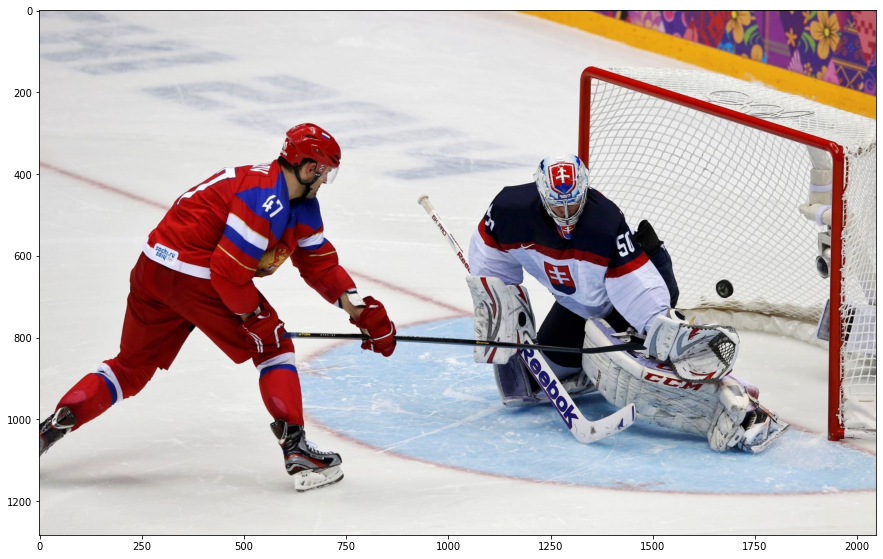

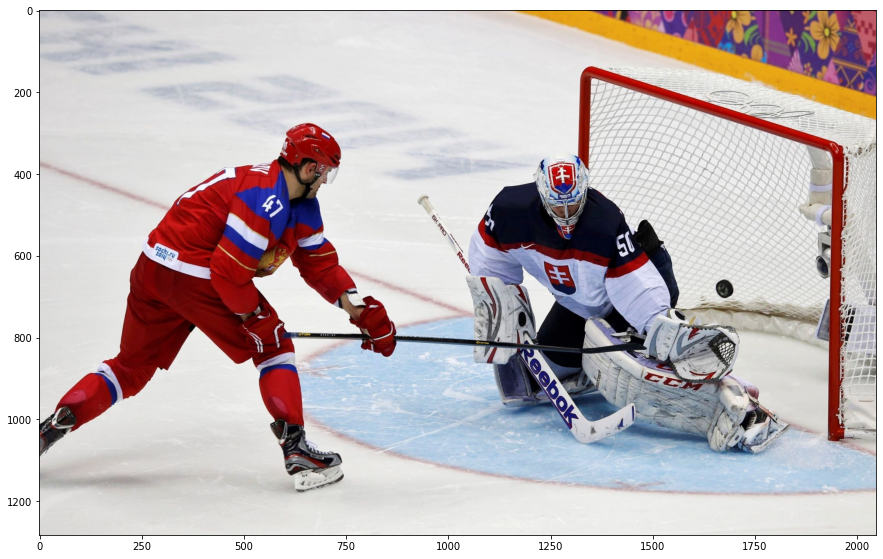

In [8]:
# Encoder les données dans l'image avec la fonction encode
image_encode = encode(input_image, message_secret)

# Enregistrer l'image encoder (image_encode)
cv2.imwrite(output_image, image_encode)

# Afficher le résultats
affichage(input_image, output_image)

In [9]:
# Decoder le message secret de l'image encoder 
decoded_data = decode(output_image)
print("[+] Mot secret:", decoded_data)

[+] Décodage...
[+] Mot secret: cyberquebec
